In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [20]:
# Cargar los datos de los archivos CSV
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')


In [21]:
print("Estadísticas descriptivas de vino tinto:")
print(red_wine.describe())

print("\nEstadísticas descriptivas de vino blanco:")
print(white_wine.describe())

Estadísticas descriptivas de vino tinto:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min    

Histogramas de las variables de vino tinto:


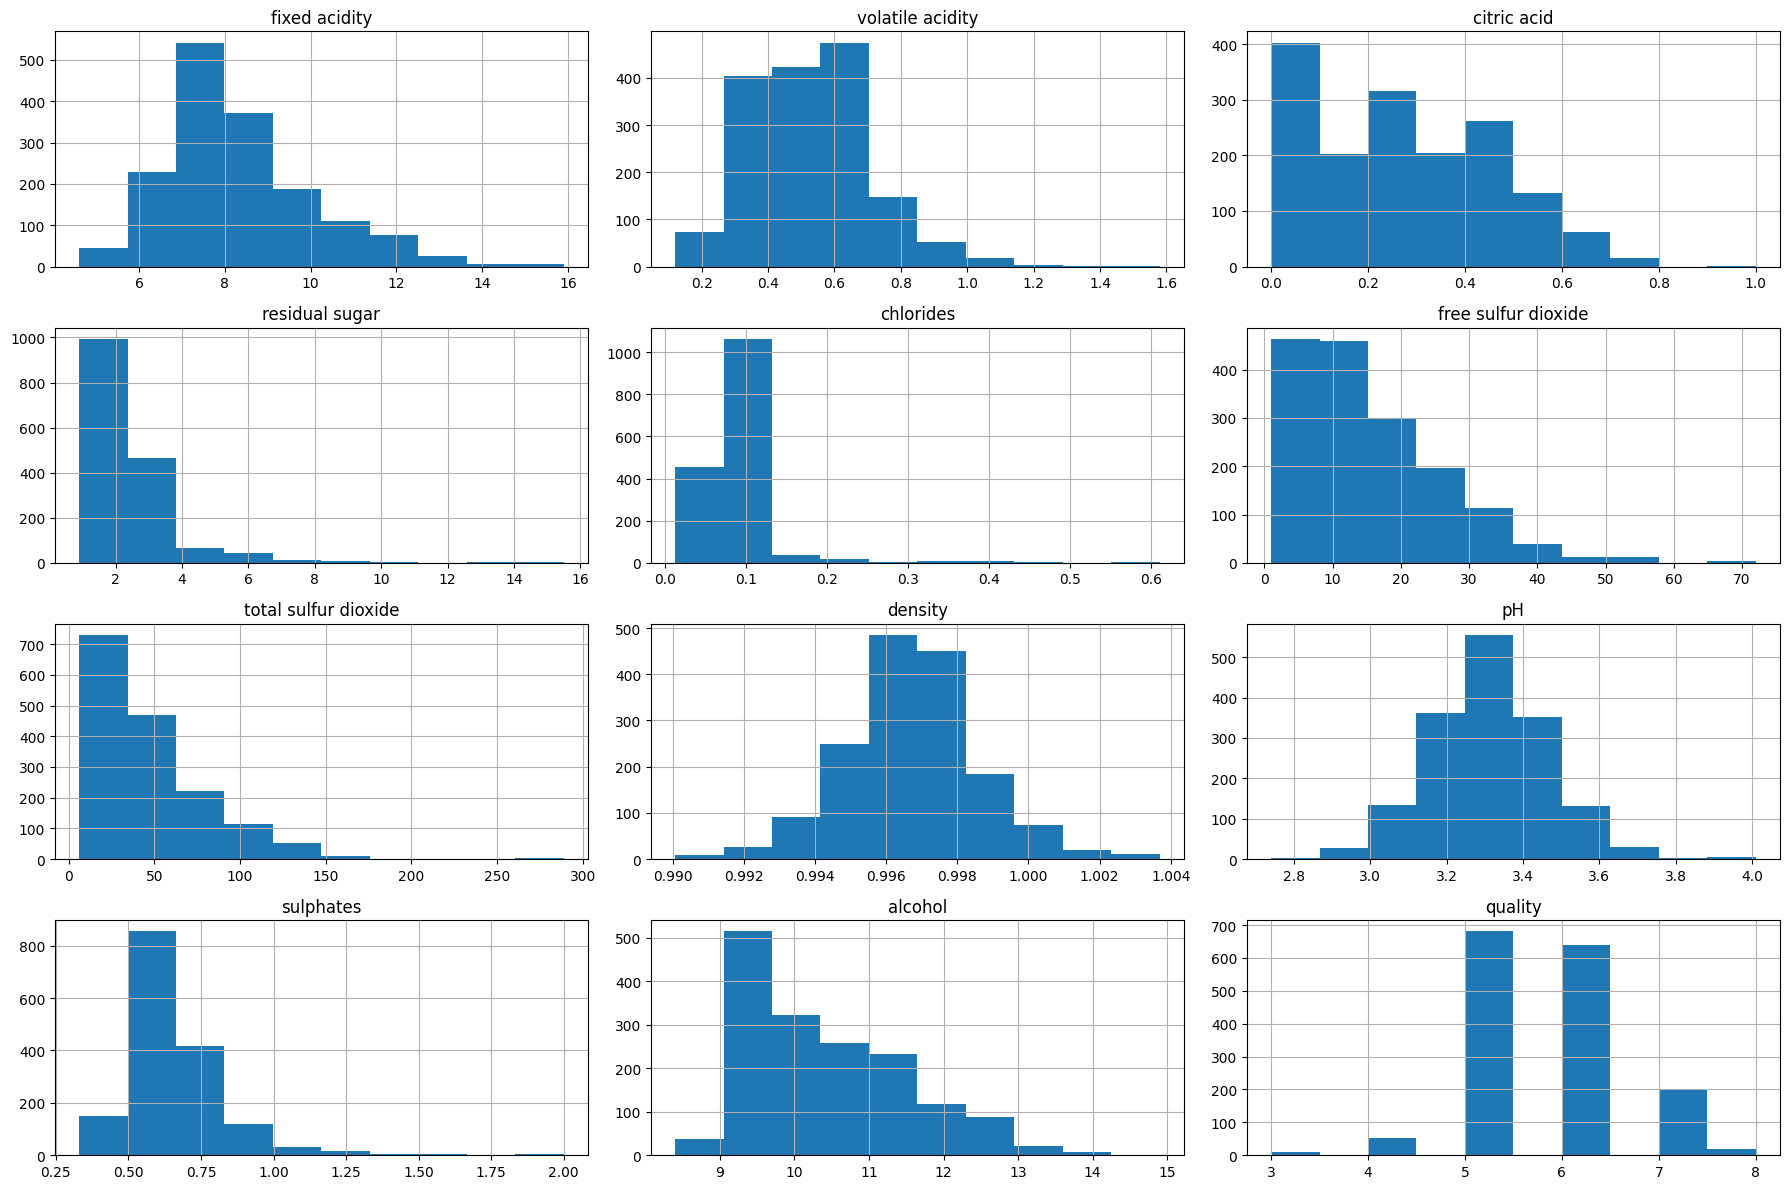

Histogramas de las variables de vino blanco:


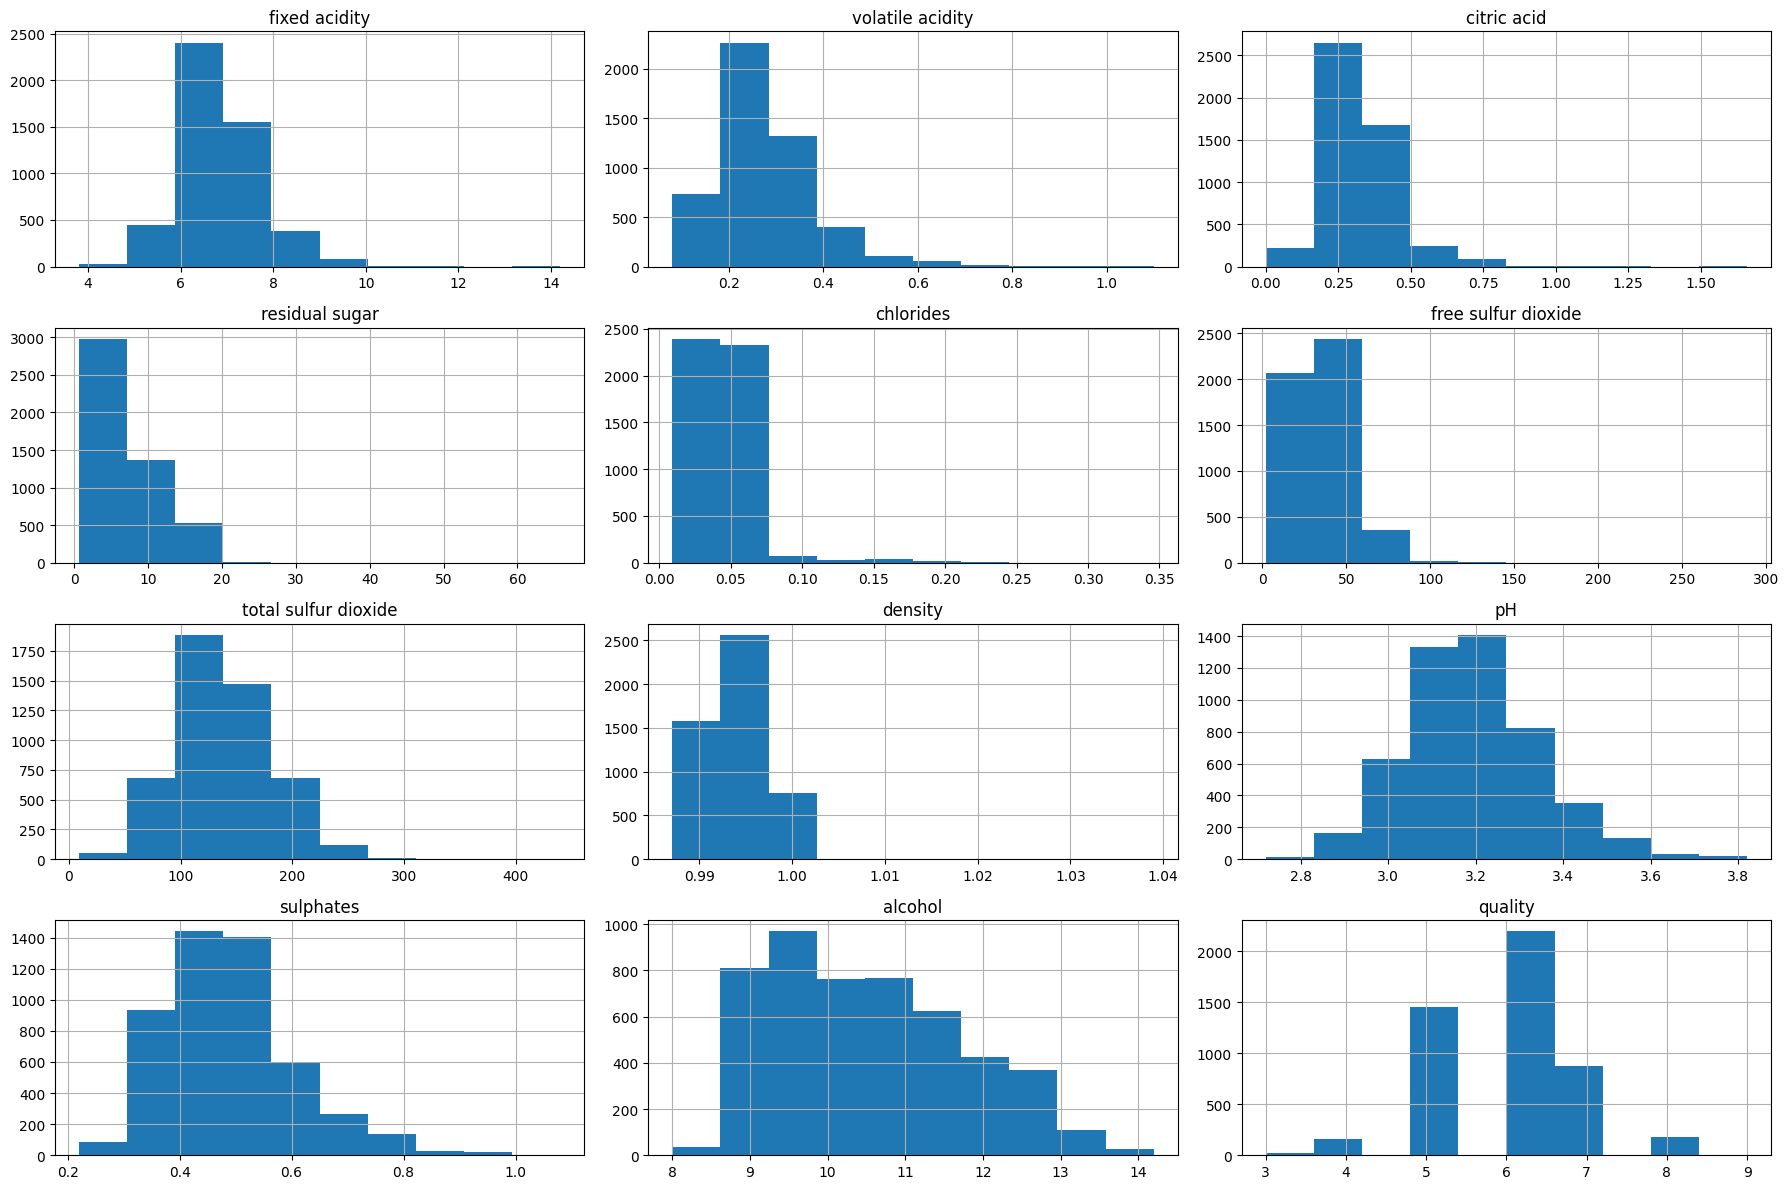

In [22]:
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
axes = axes.ravel()

print("Histogramas de las variables de vino tinto:")
for i, col in enumerate(red_wine.columns):
    red_wine[col].hist(ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

print("Histogramas de las variables de vino blanco:")
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(white_wine.columns):
    white_wine[col].hist(ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

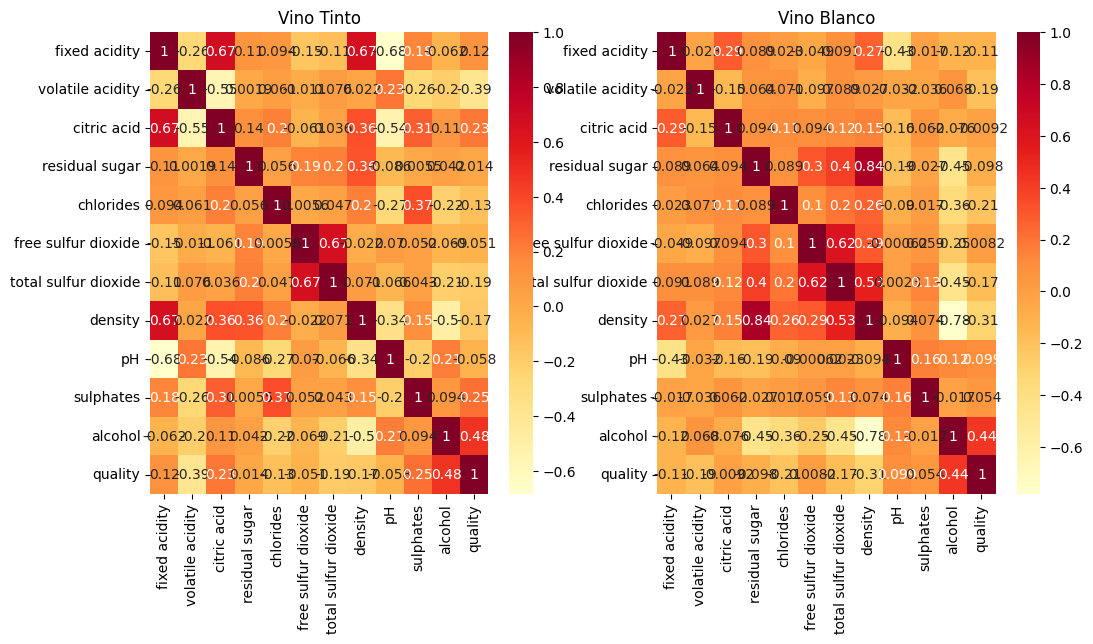

In [23]:
# Matriz de correlación
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(red_wine.corr(), annot=True, cmap='YlOrRd', ax=ax1)
ax1.set_title('Vino Tinto')
sns.heatmap(white_wine.corr(), annot=True, cmap='YlOrRd', ax=ax2)
ax2.set_title('Vino Blanco')
plt.show()

In [24]:

#normalizar datos
scaler = StandardScaler()

red_wine_scaled = pd.DataFrame(scaler.fit_transform(red_wine), columns=red_wine.columns)
white_wine_scaled = pd.DataFrame(scaler.fit_transform(white_wine), columns=white_wine.columns)

In [25]:
red_wine_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [26]:
white_wine_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.137870
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.137870
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.137870
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.137870
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.137870
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282,0.137870
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008,-0.991374
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544,0.137870
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572,1.267114


In [27]:
# Separar las características (X) y la variable objetivo (y)
X = red_wine_scaled.drop('quality', axis=1)
y = red_wine_scaled['quality']

# Dividir el conjunto de datos en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Regresión Lineal
lin_reg = LinearRegression()
param_grid_lin_reg = {'fit_intercept': [True, False]}
grid_search_lin_reg = GridSearchCV(lin_reg, param_grid_lin_reg, cv=5)
grid_search_lin_reg.fit(X_train, y_train)
print('Mejores hiperparámetros de Regresión Lineal:', grid_search_lin_reg.best_params_)

# Validación Cruzada para Regresión Lineal
scores_lin_reg = cross_val_score(grid_search_lin_reg.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nPuntuaciones de validación cruzada para Regresión Lineal:")
print(scores_lin_reg)
print("Media de puntuaciones de validación cruzada para Regresión Lineal:", abs(scores_lin_reg.mean()))

Mejores hiperparámetros de Regresión Lineal: {'fit_intercept': False}

Puntuaciones de validación cruzada para Regresión Lineal:
[-0.70908097 -0.74284514 -0.7009522  -0.69678238 -0.51584112]
Media de puntuaciones de validación cruzada para Regresión Lineal: 0.6731003648209899


In [29]:
# KNN Regresión
knn_reg = KNeighborsRegressor()
param_grid_knn = {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}
grid_search_knn = GridSearchCV(knn_reg, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
print('Mejores hiperparámetros de KNN Regresión:', grid_search_knn.best_params_)

# Validación Cruzada para KNN Regresión
scores_knn = cross_val_score(grid_search_knn.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nPuntuaciones de validación cruzada para KNN Regresión:")
print(scores_knn)
print("Media de puntuaciones de validación cruzada para KNN Regresión:", abs(scores_knn.mean()))

Mejores hiperparámetros de KNN Regresión: {'metric': 'euclidean', 'n_neighbors': 7}

Puntuaciones de validación cruzada para KNN Regresión:
[-0.76287193 -0.76018102 -0.7643397  -0.76886531 -0.60512678]
Media de puntuaciones de validación cruzada para KNN Regresión: 0.7322769499239035


In [30]:
# Random Forest 
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [3, 5, 7]}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
print('Mejores hiperparámetros de Random Forest:', grid_search_rf.best_params_)

# Validación Cruzada para Random Forest 
scores_rf = cross_val_score(grid_search_rf.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("\nPuntuaciones de validación cruzada para Random Forest:")
print(scores_rf)
print("Media de puntuaciones de validación cruzada para Random Forest:", abs(scores_rf.mean()))

Mejores hiperparámetros de Random Forest: {'max_depth': 7, 'n_estimators': 150}

Puntuaciones de validación cruzada para Random Forest:
[-0.67286464 -0.61149134 -0.65374804 -0.63597569 -0.45678811]
Media de puntuaciones de validación cruzada para Random Forest: 0.6061735650685544


In [31]:
pd.DataFrame({'Modelo': ['Regresión Lineal', 'KNN Regresión', 'Random Forest'], 
              'MSE': [abs(scores_lin_reg.mean()), abs(scores_knn.mean()), abs(scores_rf.mean())]}).sort_values(by='MSE')

,Modelo,MSE
2,Random Forest,0.606174
0,Regresión Lineal,0.673100
1,KNN Regresión,0.732277


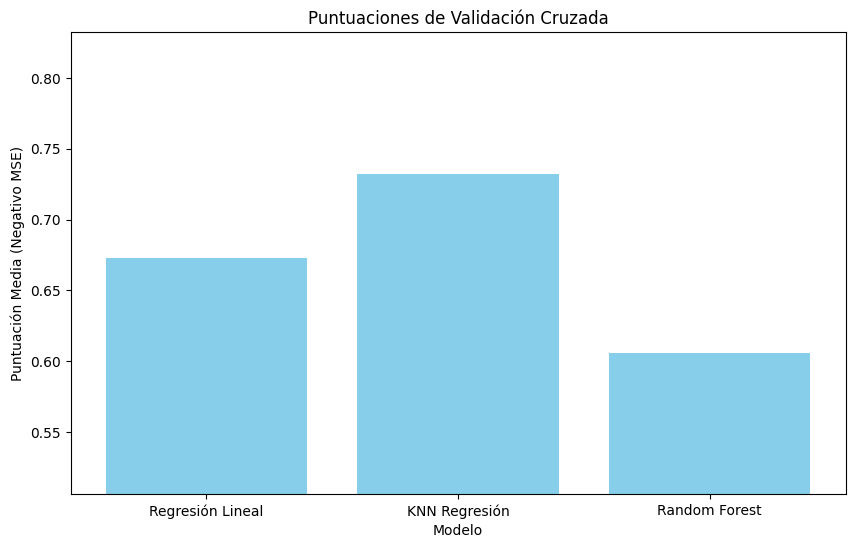

In [32]:
scores = [abs(scores_lin_reg.mean()), abs(scores_knn.mean()), abs(scores_rf.mean())]
models = ['Regresión Lineal', 'KNN Regresión', 'Random Forest']

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color='skyblue')
plt.title('Puntuaciones de Validación Cruzada')
plt.xlabel('Modelo')
plt.ylabel('Puntuación Media (Negativo MSE)')
plt.ylim(min(scores) - 0.1, max(scores) + 0.1)
plt.show()